# Pentathlon-III: Next Product to Buy Models

* Team-lead GitLab userid: dbeaudreau
* Group name: Team Nine From Outer Space
* Team member names: Chenxuan Liu, Danielle Beaudreau, Nicholas Feldman, Wan-Ting Hsu, Yijie Shi

## Setup

Please complete this python notebook with your group by answering the questions in `pentathlon-nptb.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the third group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - model1.ipynb, model2.ipynb, model3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
import qgrid
import seaborn as sns
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
from utils import functions as f
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
import os
import warnings
warnings.filterwarnings('ignore')
# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150



In [2]:
## loading the data - this dataset must NOT be changed
pentathlon_nptb = pd.read_pickle("data/pentathlon_nptb.pkl")
pentathlon_nptb["buyer_yes"] = (pentathlon_nptb["buyer"] == "yes").astype(int)

# pentathlon_nptb_5M = pd.read_pickle("data/pentathlon_nptb_5M.pkl")
# pentathlon_nptb_5M["buyer_yes"] = (pentathlon_nptb_5M["buyer"] == "yes").astype(int)
# qgrid.show_grid(pentathlon_nptb)

In [3]:
# show dataset description
rsm.describe(pentathlon_nptb)

## Pentathon III: Next Product To Buy 

The available data is based on the last e-mail sent to each Pentathlon customer. Hence, an observation or row in the data is a "customer-promotional e-mail" pair. The data contains the following basic demographic information available to Pentathlon:

* "age": Customer age(coded in 4 buckets:"<30", "30 to 44", "45 to 59", and ">=60") 
* "gender": Gender coded as F or M
* "income": Income in Euros, rounded to the nearest €5,000
* "education": Percentage of college graduates in the customer's neighborhood, coded from 0-100
* "children": Average number of children in the customer's neighborhood

The data also contains basic historical information about customer purchases, specifically, a department-specific frequency measure.

* "freq_endurance-freq_racquet": Number of purchases in each department in the last year, excluding any purchase in response to the last email.

The key outcome variables are:

* "buyer": Did the customer click on the e-mail and complete a purchase within twodays of receiving the e-mail ("yes" or "no")?
* "total_os": Total order size (in Euros) conditional on the customer having purchased (buyer == "yes"). This measures spending across all departments, not just the department that sent the message

While of no importance for the prediction model, we also have data on which departments the customer ordered from when they purchased. This was captured in:

* "endurance_os - racquet_os": Department-specific order size (in Euros). This was a breakdown of the total order size if buyer == "yes". The value was zero for most departments because customers rarely bought products from multiple departments on a single purchase occasion.

Finally, Anna requested that her team divide the data into a training sample and a test sample using a 70 - 30 split. She suggested 70,000 observations in the training sample and 30,000 observations in the test sample. Anna requested the team sample more customers who purchased relative to those that did not purchase. She had learned that some analytical tools did a better job of scoring customers if the response variable had a similar number of "yes" and "no" values.

To achieve a 50/50 split between buyers and non-buyers for the training and test sample, her team randomly picked 50,000 buyers and added 50,000 randomly sampled non-buyers. Given the actual average purchase rate of 1%, buyers in this training sample were oversampled by a factor of 50 (=0.5/0.01). The 100,000 customers were then randomly split into a training sample (70,000 customers) and a test sample (30,000 customers).

In addition to the 100,000 customers used for training and test, Anna asked the team to add a representative sample consisting of another 100,000 customers. This sample was representative in that it was a true random sample of the population and therefore contained the average proportion of buyers, namely 1%. This sample would be used to determine the expected benefits from using a next-product-to-buy model. In summary, the dataset contains 200,000 customers.

1. 70,000 in a training sample (training == 1) 
2. 30,000 in a test sample (training == 0)
3. 100,000 in a representative sample (use is.na(training) or representative == 1)

In [4]:
# run python code from another notebook
%run ./sub-notebooks/logit.ipynb

In [5]:
%run ./sub-notebooks/nn.ipynb

In [6]:
# import urllib
# from tempfile import NamedTemporaryFile as tmpfile
# nptb_file = tmpfile().name
# urllib.request.urlretrieve("https://www.dropbox.com/s/c9dq8gqgsatr0tb/pentathlon_nptb_5M.pkl?dl=1", nptb_file)
# pentathlon_nptb_5m = pd.read_pickle(nptb_file)
# pentathlon_nptb_5m.shape[0]

5100000

In [14]:
%run ./sub-notebooks/data5m.ipynb

## Case Questions 1

In [15]:
%run ./sub-notebooks/questions.ipynb


1.Below shows the message that would lead to the highest probability of purchase for each customer. The approach taken is that 7 message-specific predictions are made for each customers, and the highest probabilities from the 7 predictions are selected for each customer. 

Logistic Regression:

           custid  p_target      offer
0       U45198803  0.001233   strength
1       U22197752  0.006444      water
3       U19423462  0.003746  endurance
4       U23888305  0.004171   strength
6       U16954857  0.000800   strength
...           ...       ...        ...
199991  U12620333  0.001135  endurance
199993  U18623424  0.002357      water
199994  U64468968  0.003293  endurance
199998  U33721691  0.000779      water
199999  U23361779  0.789483  endurance

[100000 rows x 3 columns]

Neural Network:

            custid  p_target     to_offer
5        U11849565  0.001029  backcountry
18       U93919808  0.007018     strength
22       U66549067  0.001121  backcountry
24       U34117548  0.

## Case Questions 2

The proposed email rotation certainly has its merits. It takes into account of the fact that customers don't always purchase from the same department, so allocating two departments to mail each customer allows for some flexibility and variety in the products recommended.

However, there exists potential for certain issues. The one issue would be that customers will only be allocated to a new department for promotions if they made enough purchases from the new department exceeding their purchases from one of the original two departments to which they were assigned. This effectively means that, unless a customer drastically changes their purchasing behavior such that it is picked up by the model to affect predicted probabilities significantly, the customer will not see ads from another department. Also a customer with a close third preference would not be getting advertisements in the third department that they might enjoy or respond to. A potential solution is to allow for, say, 10% of the ad space for the other 5 departments featuring their most popular items to ensure there is some exposure.

Another issue with this approach is that it is purely reactive. Certain initiatives could be included so that some of the more seasonal sports activities can be featured in anticipation of customer spending shifts. For example, during summertime a factor can be applied to the water department so that its products are more likely to be featured. 

Lastly, it wasn't specified how the new data for the first three weeks of each month will be implemented. Gradually cycling out the older purchases to incorporate the new ones seems to be a logical procedure, instead of the implied method of just using three weeks' worth of data. Also, weights can be added to the data to account for the fact that some purchases were made a long time ago. This will adjust the purchase frequency variables to better represent the effect of recency.

## Models Comparison

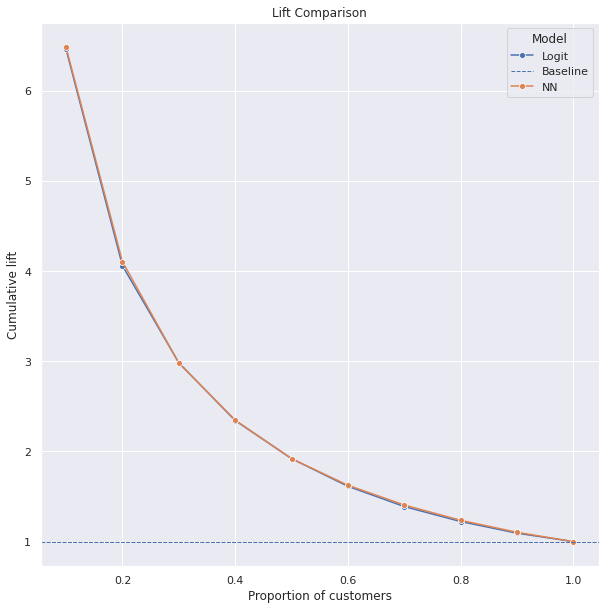

In [9]:
sns.set(rc = {'figure.figsize':(10, 10)})
fig = rsm.lift_plot(pent_std[pent_std.training < 0], 'buyer_yes', 1, 'p_target', qnt=10, marker="o")
rsm.lift_plot(df_5m_sample, 'buyer_yes', 1, 'p_target', qnt=10, marker="o")
plt.legend(title='Model', loc='upper right', labels=['Logit', 'Baseline', 'NN'])
fig.set(title = 'Lift Comparison')
plt.show()

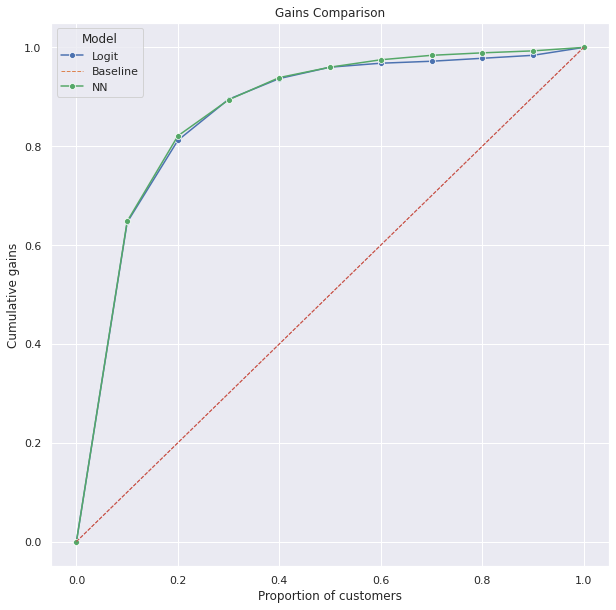

In [10]:
sns.set(rc = {'figure.figsize':(10, 10)})
fig = rsm.gains_plot(pent_std[pent_std.training < 0], 'buyer_yes', 1, 'p_target', qnt=10, marker="o")
rsm.gains_plot(df_5m_sample, 'buyer_yes', 1, 'p_target', qnt=10, marker="o")
plt.legend(title='Model', loc='upper left', labels=['Logit', 'Baseline', 'NN'])
fig.set(title = 'Gains Comparison')
plt.show()

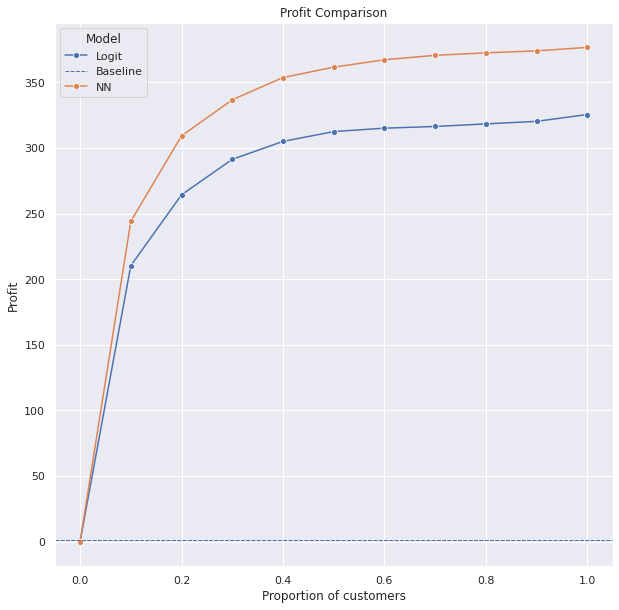

In [11]:
sns.set(rc = {'figure.figsize':(10, 10)})
fig = rsm.profit_plot(pent_std[pent_std.training < 0], 'buyer_yes', 1, 'p_target', cost = 0, margin = 0.325497, qnt=10, marker="o")
rsm.profit_plot(df_5m_sample, 'buyer_yes', 1, 'p_target', cost = 0, margin = 0.376635, qnt=10, marker="o")
plt.legend(title='Model', loc='upper left', labels=['Logit', 'Baseline', 'NN'])
fig.set(title = 'Profit Comparison')
plt.show()

                          index     OR     OR%   2.5%  97.5% p.values     
1                   gender[T.F]  0.628  -37.2%  0.569  0.693   < .001  ***
2     age[T.30 to 44]:gender[M]  1.886   88.6%  1.674  2.125   < .001  ***
3     age[T.45 to 59]:gender[M]  2.287  128.7%  2.026  2.582   < .001  ***
4        age[T.>= 60]:gender[M]  1.024    2.4%  0.883  1.187    0.758     
5     age[T.30 to 44]:gender[F]  2.045  104.5%  1.803  2.319   < .001  ***
..                          ...    ...     ...    ...    ...      ...  ...
163         education:freq_team  1.098    9.8%  1.058  1.138   < .001  ***
164  education:freq_backcountry  0.955   -4.5%  0.926  0.984    0.003   **
165      education:freq_racquet  0.828  -17.2%  0.798  0.859   < .001  ***
166          children:freq_team  1.054    5.4%  1.018  1.092    0.003   **
167   children:freq_backcountry  0.940   -6.0%  0.908  0.972   < .001  ***

[167 rows x 7 columns]

Pseudo R-squared (McFadden): 0.242
Pseudo R-squared (McFadden adjusted): 0.

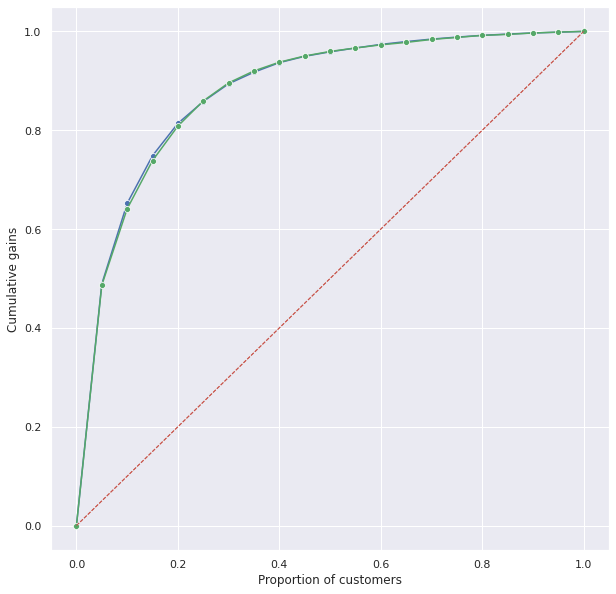

<Figure size 720x720 with 0 Axes>

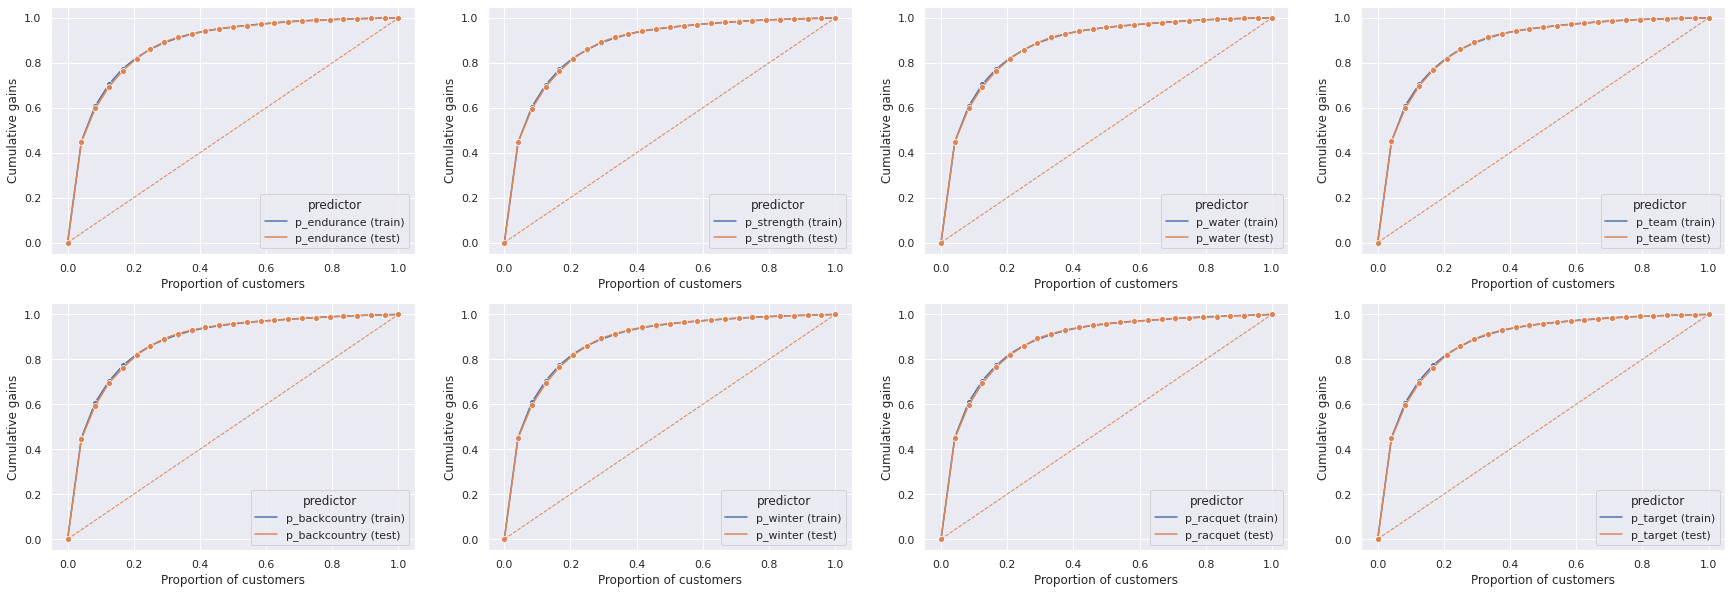

NN Train AUC: 0.888

NN Test AUC: 0.887



In [12]:
%run ./sub-notebooks/metrics.ipynb

In [13]:
# GridSearch

hls = [(7,7,7,7),(15,15)]
clf = f.nn(X_train, y_train, (1,))

param_grid = {"hidden_layer_sizes": hls}
scoring = {"AUC": "roc_auc"}

clf_cv = GridSearchCV(
    clf, param_grid, scoring=scoring, cv=3, n_jobs=4, refit="AUC", verbose=5
)
clf_cv.fit(X_train, y_train,)

print(clf_cv.best_params_)
print(clf_cv.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'hidden_layer_sizes': (7, 7, 7, 7)}
0.8896168341263567
